In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("F:/WB/Issue Monitoring/data/TOP_10_Evolution_Weekly_Issue_Keyword_user_level.csv")
df=df.drop(columns=['week_of_the_year'])

In [3]:
df.head()

,user_id,tweets_count,favorite_count,retweet_count,reply_count,verified,sentiment_score,confidence in government,economic policy,employment,food access,health care,health protocol,mobility,stigma
0,1209811957768835072,1,22,3,7,False,0.166667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,49582053,1,0,0,0,False,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,190666622,4,80,31,3,False,-0.142857,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1226050062762954757,77,0,0,0,False,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,380183734,21,0,0,0,False,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


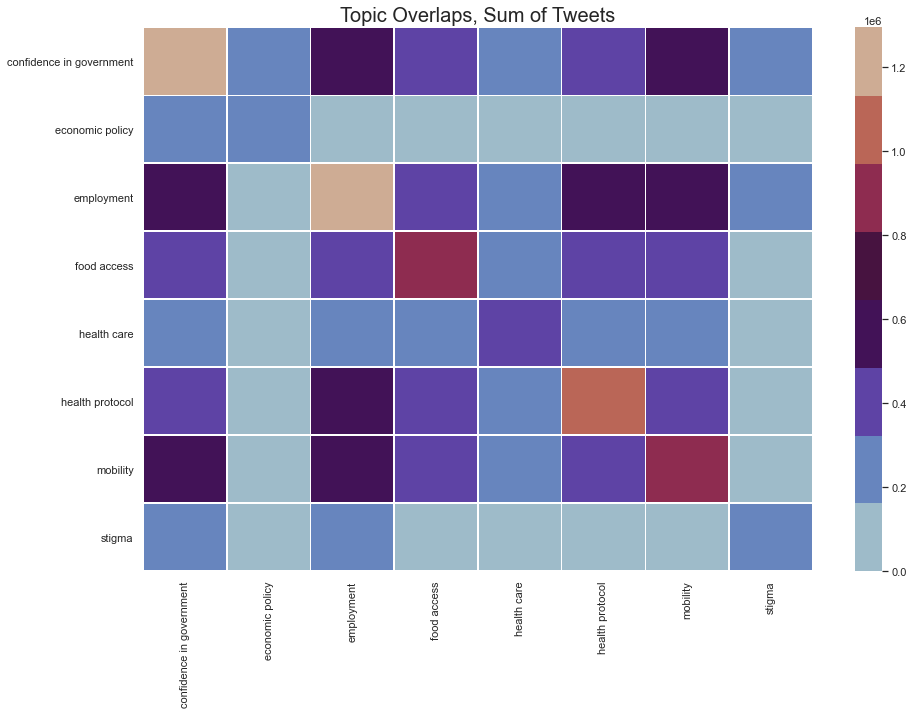

In [4]:
mat = np.zeros((8,8))
topic_list = ['confidence in government','economic policy','employment','food access','health care','health protocol','mobility','stigma']
for i in range(8):
    for j in range(8):
        mat[i,j] = df[(df[topic_list[i]]==1) & (df[topic_list[j]]==1)]['tweets_count'].sum()

sum_df = pd.DataFrame(mat)
sum_df.columns = topic_list
sum_df.index = topic_list

fig, ax = plt.subplots(figsize=(15,10))
pal = sns.color_palette("twilight",8)
ax = sns.heatmap(sum_df,linewidths=.5,cmap=pal,vmin=0, vmax=mat.max())
plt.title('Topic Overlaps, Sum of Tweets',fontsize=20)
plt.show()

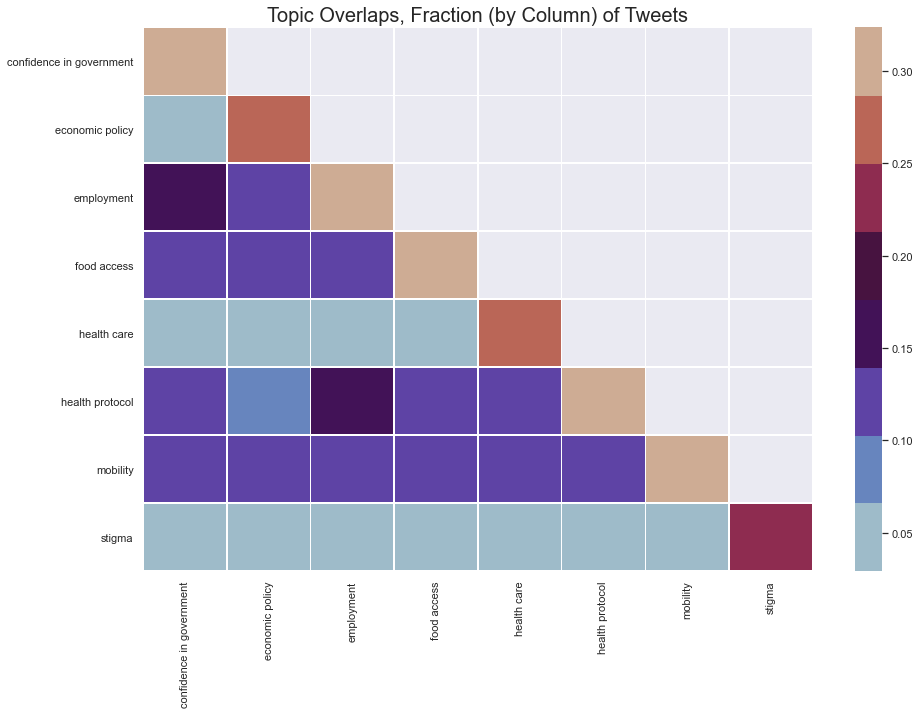

In [5]:
mat_percent = np.zeros((8,8))

for i in range(8):
    mat_percent[:,i] = mat[:,i]/mat[:,i].sum()

percent_df = pd.DataFrame(mat_percent)
percent_df.columns = topic_list
percent_df.index = topic_list

fig, ax = plt.subplots(figsize=(15,10))
pal = sns.color_palette("twilight",8)
mask = np.zeros_like(sum_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
for i in range(8):
    mask[i,i] = False
ax = sns.heatmap(percent_df,mask=mask,linewidths=.5,cmap=pal)
plt.title('Topic Overlaps, Fraction (by Column) of Tweets',fontsize=20)
plt.show()